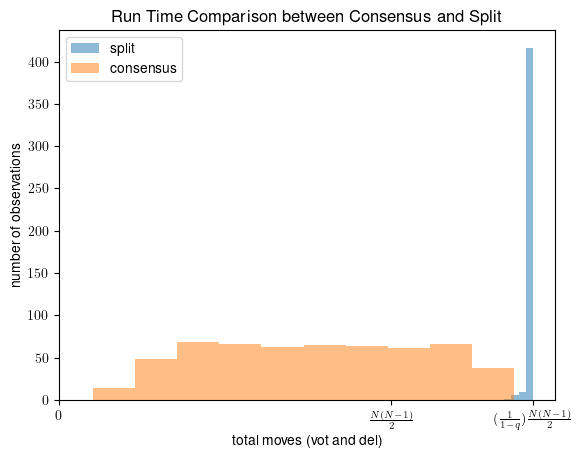

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

FILENAME = "testfilename_clean"
N_VOTERS = 1024

def read_summary(filename):
    return pd.read_csv(filename, skiprows=lambda x: x!=1 and ((x+1) % 3) !=0, index_col=False)

def read_opinions(filename):
    return pd.read_csv(filename, skiprows=lambda x: x==0 or (x % 3) !=0, names=[i for i in np.arange(N_VOTERS)], 
                       index_col=False)

def read_components(filename):
    return pd.read_csv(filename, skiprows=lambda x: x==1 or ((x-1) % 3) !=0, names=[i for i in np.arange(N_VOTERS)], 
                       index_col=False)



summary = read_summary(FILENAME)
opinions = read_opinions(FILENAME)
components = read_components(FILENAME)

df = pd.concat([summary, opinions, components], axis=1, keys=["summary","opinions","components"])

#split_df = df[df["final_state"] =="real_split"]
#consensus_df = df[df["final_state"] =="real_consensus"]
#unfinished_df = df[df["final_state"] =="unfinished"]


#assert len(unfinished_df) + len(consensus_df) + len(split_df) == 1000

#äold = df[df["summary"]["final_state"]=="real_split"]["summary"]["n_vot_moves"]+df[df["summary"]["final_state"]=="real_split"]["summary"]["n_del_moves"]

#new = df[df["summary"]["final_state"]=="real_consensus"]["summary"]["n_vot_moves"]+df[df["summary"]["final_state"]=="real_consensus"]["summary"]["n_del_moves"]

plt.hist(df[df["summary"]["final_state"]=="real_split"]["summary"]["n_vot_moves"]
         +df[df["summary"]["final_state"]=="real_split"]["summary"]["n_del_moves"], alpha=0.5,label="split", bins=[747521-6*11227,747521-5*11227,747521-4*11227,747521-3*11227,747521-2*11227,747521-11227,747521])

(n, bins, patches) = plt.hist(df[df["summary"]["final_state"]=="real_consensus"]["summary"]["n_vot_moves"]
         +df[df["summary"]["final_state"]=="real_consensus"]["summary"]["n_del_moves"], alpha=0.5,label="consensus")


plt.legend()
plt.xlabel("total moves (vot and del)")
plt.ylabel("number of observations")
plt.title("Run Time Comparison between Consensus and Split")
plt.xticks([0, N_VOTERS*(N_VOTERS-1)/2, (1+0.3/(1-0.3))*N_VOTERS*(N_VOTERS-1)/2], labels=["$0$",r"$\frac{N(N-1)}{2}$",r"$(\frac{1}{1-q})\frac{N(N-1)}{2}$"])
plt.show()

In [284]:
split_components = df[df["summary"]["final_state"]=="real_split"]["components"]


def get_component_sizes(row):
    component_sizes = row.value_counts().iloc[0:3].values
    if len(component_sizes) < 3:
        component_sizes = np.concatenate([component_sizes, np.zeros(3-len(component_sizes),dtype=int)])
    return component_sizes


def get_component_numbers(row):
    component_numbers = row.value_counts().iloc[0:3].index.values
    if len(component_numbers) < 3:
        component_numbers = np.concatenate([component_numbers,-np.ones(3-len(component_numbers), dtype=int)])
    return component_numbers

component_sizes = split_components.apply(get_component_sizes, axis=1,result_type='expand')
component_sizes.columns = [1,2,3]

component_numbers = split_components.apply(get_component_numbers, axis=1,result_type='expand')
component_numbers.columns = [1,2,3]

components_summary =  pd.concat([component_sizes, component_numbers], axis=1, keys=["sizes","numbers"])

all_df = pd.concat([components_summary,df[df["summary"]["final_state"]=="real_split"][["summary"]]],axis=1)

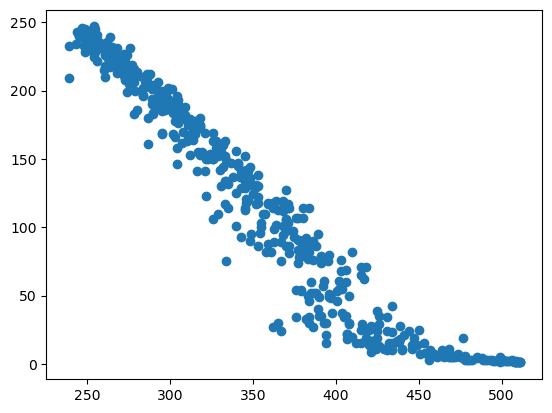

In [ ]:
plt.scatter(components_summary["sizes"][1],components_summary["sizes"][2])

(array([57., 64., 58., 58., 54., 62., 40., 27., 30., 34.]),
 array([239. , 266.2, 293.4, 320.6, 347.8, 375. , 402.2, 429.4, 456.6,
        483.8, 511. ]),
 <BarContainer object of 10 artists>)

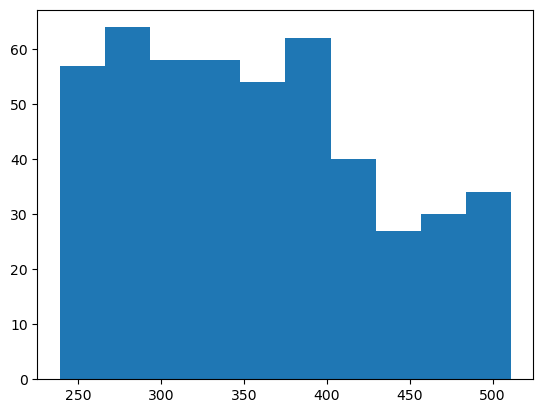

In [281]:
plt.hist(components_summary["sizes"][1])

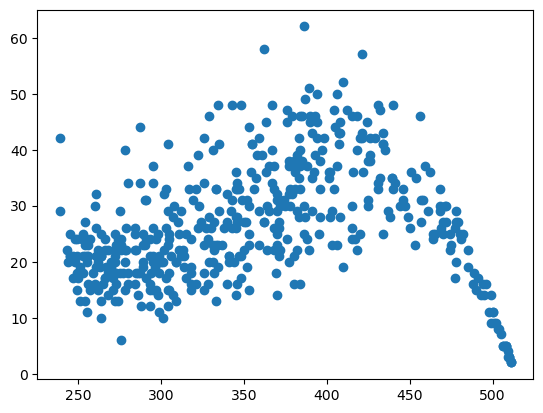

In [286]:
plt.scatter(all_df["sizes"][1], all_df["summary"]["n_conn_comp"])

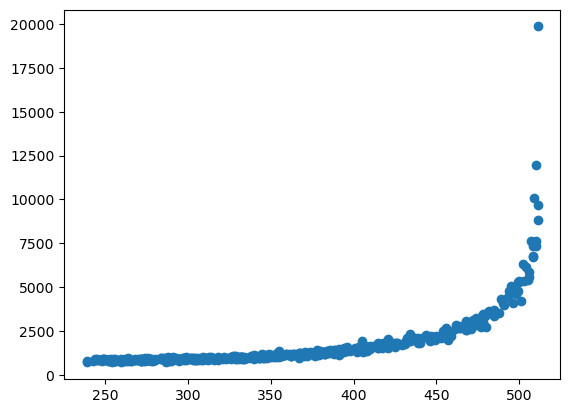

In [288]:
plt.scatter(all_df["sizes"][1], 512*511/2-all_df["summary"]["n_del_moves"])